In [1]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
mesh = Make1DMesh(100, mapping=None, periodic=False)
# uniform distributed load
q = np.arange(start=0, stop=50, step=5)
# Draw(mesh)

In [3]:
w = H1(mesh, order=1, dirichlet="left|right")
sigma = H1(mesh, order=1, dirichlet=" ")
mu = NumberSpace(mesh)
fesm = w*sigma*mu
print ("ndof =", fesm.ndof)

ndof = 203


In [4]:
w, sigma, mu = fesm.TrialFunction()
v , tau, lamda = fesm.TestFunction()

In [5]:
y_axis = []

[0.0,
 0.013010418750000056,
 0.026020837500000112,
 0.039031256249999334,
 0.052041675000000225,
 0.06505209374999917,
 0.07806251249999867,
 0.0910729312499977,
 0.10408335000000045,
 0.11709376874999725]

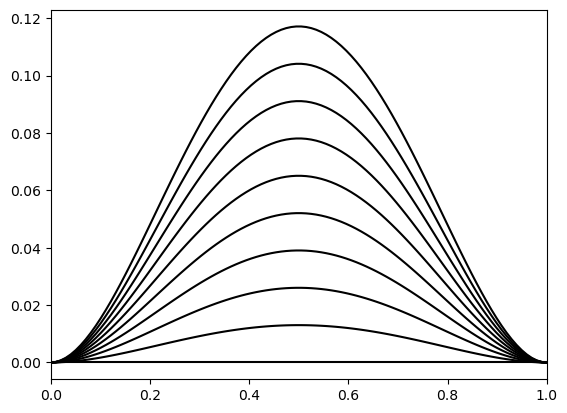

In [6]:
for i in q:
    a = BilinearForm(fesm)
    a += (grad(sigma)*grad(v) + 1/2*grad(w)*grad(v)*mu + sigma*tau \
       + grad(w)*grad(tau) + mu*lamda - grad(w)**2*lamda )*dx
    f = LinearForm(fesm)
    f += -i*v*dx
    
    gfsol = GridFunction(fesm)
    
    a.Assemble()
    f.Assemble()
    gfsol.vec.data = a.mat.Inverse(fesm.FreeDofs(),inverse="umfpack")*f.vec
    gfw, gfsigma, gfmu = gfsol.components
    x=np.linspace(0,1,100)
#     gfw(mesh(x))

    plt.plot(x,gfw(mesh(x)),color='black',label='Transverse Load = 0.4',linestyle="-")
#     plt.ylim([-0.0025, 0.0025])
    plt.xlim([0, 1.0])
    index = int((len(gfw.vec)+1)/2)
#     print(gfw.vec[index])
    y_axis.append(gfw.vec[index])

y_axis

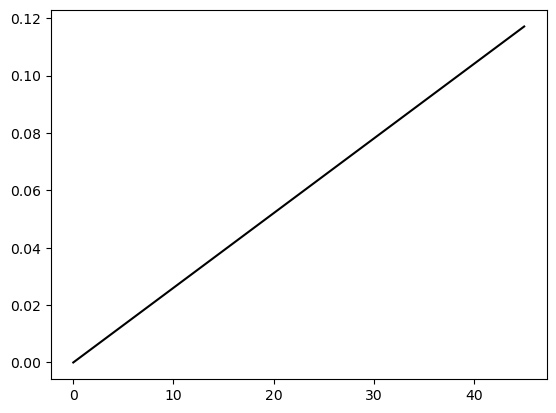

In [7]:
plt.plot(q,y_axis,color='black',label='Transverse Load = 0.4',linestyle="-")

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,1,100)
gfw(mesh(x))

plt.plot(x,gfw(mesh(x)),color='black',label='Transverse Load = 0.4',linestyle="-")
plt.ylim([-0.0025, 0.0025])
plt.xlim([0, 1.0])
plt.title("Numerical Solution")
plt.xlabel("Length(L)")
plt.ylabel("Deflection(w)")
plt.legend()

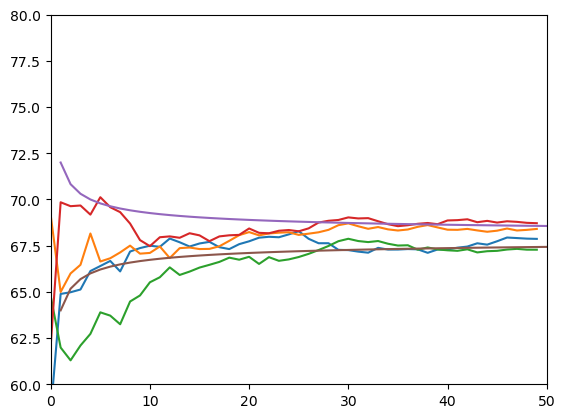

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.axis([0,50,60,80])
for i in np.arange(1,5):
    z = 68 + 4 * np.random.randn(50)
    zm = np.cumsum(z) / range(1,len(z)+1)
    plt.plot(zm)    

n = np.arange(1,51)
su = 68 + 4 / np.sqrt(n)
sl = 68 - 4 / np.sqrt(n)

plt.plot(n,su,n,sl)

plt.show()

In [3]:
load = np.arange(start=0, stop=1, step=0.1)

for i in load:
    print(i)

0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9


In [ ]:
np.arange(start=1, stop=10, step=1)

In [ ]:
import matplotlib.pyplot as plt
from cycler import cycler
#
plt.figure()
for i in range(5):
    x = range(i,i+5)
    linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
    plt.rc('axes', prop_cycle=linestyle_cycler)
    plt.plot(range(5),x)
    plt.legend(['first','second','third','fourth','fifth'], loc='upper left', fancybox=True, shadow=True)
plt.show()